# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 7196 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=1)


  0% (   0 of 7196) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   5 of 7196) |                      | Elapsed Time: 0:00:27 ETA: 10:57:58

  0% (  21 of 7196) |                       | Elapsed Time: 0:00:27 ETA: 2:37:28

  0% (  37 of 7196) |                       | Elapsed Time: 0:00:27 ETA: 1:29:53

  0% (  52 of 7196) |                       | Elapsed Time: 0:00:28 ETA: 1:04:18

  0% (  68 of 7196) |                       | Elapsed Time: 0:00:28 ETA: 0:01:44

  1% (  83 of 7196) |                       | Elapsed Time: 0:00:28 ETA: 0:01:38

  1% (  98 of 7196) |                       | Elapsed Time: 0:00:28 ETA: 0:01:39

  1% ( 115 of 7196) |                       | Elapsed Time: 0:00:28 ETA: 0:01:35

  1% ( 133 of 7196) |                       | Elapsed Time: 0:00:29 ETA: 0:01:34

  2% ( 151 of 7196) |                       | Elapsed Time: 0:00:29 ETA: 0:01:29

  2% ( 169 of 7196) |                       | Elapsed Time: 0:00:29 ETA: 0:01:25

  2% ( 189 of 7196) |                       | Elapsed Time: 0:00:29 ETA: 0:01:22

  2% ( 207 of 7196) |                       | Elapsed Time: 0:00:30 ETA: 0:01:22

  3% ( 224 of 7196) |                       | Elapsed Time: 0:00:30 ETA: 0:01:23

  3% ( 242 of 7196) |                       | Elapsed Time: 0:00:30 ETA: 0:01:23

  3% ( 259 of 7196) |                       | Elapsed Time: 0:00:30 ETA: 0:01:24

  3% ( 278 of 7196) |                       | Elapsed Time: 0:00:30 ETA: 0:01:28

  4% ( 294 of 7196) |                       | Elapsed Time: 0:00:31 ETA: 0:01:30

  4% ( 310 of 7196) |                       | Elapsed Time: 0:00:31 ETA: 0:01:32

  4% ( 326 of 7196) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:35

  4% ( 342 of 7196) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:34

  5% ( 360 of 7196) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:34

  5% ( 376 of 7196) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:34

  5% ( 392 of 7196) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:33

  5% ( 408 of 7196) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:33

  5% ( 424 of 7196) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:33

  6% ( 440 of 7196) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:33

  6% ( 458 of 7196) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:32

  6% ( 474 of 7196) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:32

  6% ( 490 of 7196) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:31

  7% ( 506 of 7196) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:31

  7% ( 522 of 7196) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:30

  7% ( 540 of 7196) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:29

  7% ( 556 of 7196) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:29

  7% ( 572 of 7196) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:28

  8% ( 586 of 7196) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:31

  8% ( 602 of 7196) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:32

  8% ( 618 of 7196) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:33

  8% ( 638 of 7196) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:34

  9% ( 655 of 7196) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:30

  9% ( 671 of 7196) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:30

  9% ( 687 of 7196) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:29

  9% ( 705 of 7196) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:26

 10% ( 728 of 7196) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:24

 10% ( 745 of 7196) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:23

 10% ( 761 of 7196) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:22

 10% ( 777 of 7196) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:23

 11% ( 793 of 7196) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:25

 11% ( 810 of 7196) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:25

 11% ( 826 of 7196) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:24

 11% ( 842 of 7196) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:24

 11% ( 858 of 7196) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:23

 12% ( 873 of 7196) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:24

 12% ( 889 of 7196) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:24

 12% ( 909 of 7196) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:21

 12% ( 927 of 7196) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:19

 13% ( 945 of 7196) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:17

 13% ( 960 of 7196) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:19

 13% ( 977 of 7196) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:18

 13% ( 998 of 7196) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:19

 14% (1012 of 7196) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:24

 14% (1024 of 7196) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:30

 14% (1042 of 7196) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:24

 14% (1058 of 7196) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:26

 15% (1080 of 7196) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:23

 15% (1097 of 7196) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:17

 15% (1111 of 7196) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:18

 15% (1127 of 7196) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:20

 15% (1143 of 7196) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:21

 16% (1159 of 7196) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:24

 16% (1178 of 7196) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:24

 16% (1195 of 7196) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:22

 16% (1210 of 7196) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:23

 17% (1226 of 7196) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:23

 17% (1243 of 7196) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:21

 17% (1260 of 7196) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:20

 17% (1278 of 7196) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:18

 18% (1296 of 7196) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:15

 18% (1312 of 7196) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:13

 18% (1328 of 7196) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:14

 18% (1350 of 7196) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:16

 19% (1368 of 7196) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:14

 19% (1386 of 7196) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:13

 19% (1404 of 7196) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:12

 19% (1422 of 7196) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:10

 20% (1440 of 7196) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:10

 20% (1456 of 7196) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:12

 20% (1473 of 7196) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:12

 20% (1488 of 7196) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:14

 20% (1506 of 7196) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:12

 21% (1530 of 7196) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:11

 21% (1547 of 7196) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:11

 21% (1560 of 7196) |####                   | Elapsed Time: 0:00:48 ETA: 0:02:11

 21% (1577 of 7196) |#####                  | Elapsed Time: 0:00:49 ETA: 0:02:09

 22% (1592 of 7196) |#####                  | Elapsed Time: 0:00:49 ETA: 0:02:14

 22% (1609 of 7196) |#####                  | Elapsed Time: 0:00:49 ETA: 0:02:20

 22% (1628 of 7196) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:13

 22% (1646 of 7196) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:11

 23% (1663 of 7196) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:10

 23% (1679 of 7196) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:09

 23% (1696 of 7196) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:09

 23% (1719 of 7196) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:08

 24% (1736 of 7196) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:08

 24% (1754 of 7196) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:08

 24% (1772 of 7196) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:07

 24% (1790 of 7196) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:06

 25% (1809 of 7196) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:05

 25% (1826 of 7196) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:05

 25% (1844 of 7196) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:05

 25% (1862 of 7196) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:05

 26% (1880 of 7196) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:04

 26% (1897 of 7196) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:04

 26% (1915 of 7196) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:03

 26% (1933 of 7196) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:01

 27% (1950 of 7196) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:02

 27% (1966 of 7196) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:04

 27% (1988 of 7196) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:04

 27% (2005 of 7196) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:06

 28% (2021 of 7196) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:06

 28% (2039 of 7196) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:06

 28% (2056 of 7196) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:04

 28% (2077 of 7196) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:05

 29% (2094 of 7196) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:04

 29% (2110 of 7196) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:05

 29% (2127 of 7196) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:05

 29% (2144 of 7196) |######                 | Elapsed Time: 0:00:56 ETA: 0:01:04

 30% (2168 of 7196) |######                 | Elapsed Time: 0:00:56 ETA: 0:01:03

 30% (2184 of 7196) |######                 | Elapsed Time: 0:00:56 ETA: 0:01:02

 30% (2199 of 7196) |#######                | Elapsed Time: 0:00:56 ETA: 0:01:04

 30% (2214 of 7196) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:04

 31% (2231 of 7196) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:04

 31% (2249 of 7196) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:06

 31% (2266 of 7196) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:04

 31% (2283 of 7196) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:02

 31% (2300 of 7196) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:02

 32% (2318 of 7196) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:01

 32% (2339 of 7196) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:01

 32% (2356 of 7196) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:00

 32% (2372 of 7196) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:01

 33% (2389 of 7196) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:01

 33% (2405 of 7196) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:01

 33% (2421 of 7196) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:02

 33% (2437 of 7196) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:01

 34% (2453 of 7196) |#######                | Elapsed Time: 0:01:00 ETA: 0:01:02

 34% (2469 of 7196) |#######                | Elapsed Time: 0:01:00 ETA: 0:01:02

 34% (2485 of 7196) |#######                | Elapsed Time: 0:01:00 ETA: 0:01:02

 34% (2499 of 7196) |#######                | Elapsed Time: 0:01:00 ETA: 0:01:03

 35% (2519 of 7196) |########               | Elapsed Time: 0:01:01 ETA: 0:01:02

 35% (2534 of 7196) |########               | Elapsed Time: 0:01:01 ETA: 0:01:02

 35% (2552 of 7196) |########               | Elapsed Time: 0:01:01 ETA: 0:01:00

 35% (2567 of 7196) |########               | Elapsed Time: 0:01:01 ETA: 0:01:00

 35% (2584 of 7196) |########               | Elapsed Time: 0:01:01 ETA: 0:00:58

 36% (2609 of 7196) |########               | Elapsed Time: 0:01:02 ETA: 0:00:57

 36% (2627 of 7196) |########               | Elapsed Time: 0:01:02 ETA: 0:00:56

 36% (2644 of 7196) |########               | Elapsed Time: 0:01:02 ETA: 0:00:56

 36% (2660 of 7196) |########               | Elapsed Time: 0:01:02 ETA: 0:00:56

 37% (2678 of 7196) |########               | Elapsed Time: 0:01:03 ETA: 0:00:56

 37% (2699 of 7196) |########               | Elapsed Time: 0:01:03 ETA: 0:00:56

 37% (2715 of 7196) |########               | Elapsed Time: 0:01:03 ETA: 0:00:57

 37% (2733 of 7196) |########               | Elapsed Time: 0:01:03 ETA: 0:00:56

 38% (2750 of 7196) |########               | Elapsed Time: 0:01:03 ETA: 0:00:56

 38% (2766 of 7196) |########               | Elapsed Time: 0:01:04 ETA: 0:00:56

 38% (2789 of 7196) |########               | Elapsed Time: 0:01:04 ETA: 0:00:56

 38% (2805 of 7196) |########               | Elapsed Time: 0:01:04 ETA: 0:00:56

 39% (2822 of 7196) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:55

 39% (2840 of 7196) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:55

 39% (2858 of 7196) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:54

 40% (2879 of 7196) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:53

 40% (2895 of 7196) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:53

 40% (2911 of 7196) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:53

 40% (2927 of 7196) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:54

 40% (2942 of 7196) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:55

 41% (2959 of 7196) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:55

 41% (2978 of 7196) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:54

 41% (2994 of 7196) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:54

 41% (3010 of 7196) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:53

 42% (3027 of 7196) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:53

 42% (3045 of 7196) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:52

 42% (3068 of 7196) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:51

 42% (3085 of 7196) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:51

 43% (3100 of 7196) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:52

 43% (3117 of 7196) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:52

 43% (3134 of 7196) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:52

 43% (3158 of 7196) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:52

 44% (3174 of 7196) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:51

 44% (3192 of 7196) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:49

 44% (3208 of 7196) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:50

 44% (3224 of 7196) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:49

 45% (3248 of 7196) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:49

 45% (3264 of 7196) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:50

 45% (3280 of 7196) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:52

 45% (3295 of 7196) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:51

 46% (3311 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:51

 46% (3329 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:51

 46% (3346 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:49

 46% (3363 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:48

 46% (3379 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:47

 47% (3393 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:49

 47% (3407 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:52

 47% (3427 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:52

 47% (3444 of 7196) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:52

 48% (3461 of 7196) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:50

 48% (3476 of 7196) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:48

 48% (3492 of 7196) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:47

 48% (3509 of 7196) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:47

 49% (3527 of 7196) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:46

 49% (3545 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:46

 49% (3562 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:44

 49% (3580 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:43

 50% (3599 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:44

 50% (3616 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:44

 50% (3631 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:45

 50% (3647 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:46

 50% (3665 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:45

 51% (3688 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:45

 51% (3706 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:44

 51% (3723 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:42

 51% (3737 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:43

 52% (3754 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:43

 52% (3770 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:44

 52% (3786 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:45

 52% (3802 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:44

 53% (3818 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:44

 53% (3835 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:44

 53% (3851 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:43

 53% (3868 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:43

 53% (3885 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:43

 54% (3903 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:42

 54% (3920 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:41

 54% (3938 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:40

 55% (3958 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:39

 55% (3975 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:39

 55% (3991 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:39

 55% (4005 of 7196) |############           | Elapsed Time: 0:01:20 ETA: 0:00:41

 55% (4019 of 7196) |############           | Elapsed Time: 0:01:20 ETA: 0:00:42

 56% (4033 of 7196) |############           | Elapsed Time: 0:01:20 ETA: 0:00:45

 56% (4048 of 7196) |############           | Elapsed Time: 0:01:20 ETA: 0:00:45

 56% (4064 of 7196) |############           | Elapsed Time: 0:01:20 ETA: 0:00:44

 56% (4080 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:43

 56% (4095 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:42

 57% (4111 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:41

 57% (4126 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:41

 57% (4146 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:41

 57% (4162 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:41

 58% (4177 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:41

 58% (4194 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:39

 58% (4212 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:38

 58% (4228 of 7196) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:37

 59% (4246 of 7196) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:36

 59% (4263 of 7196) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:35

 59% (4281 of 7196) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:35

 59% (4297 of 7196) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:35

 60% (4318 of 7196) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:35

 60% (4334 of 7196) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:36

 60% (4351 of 7196) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:36

 60% (4368 of 7196) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:36

 60% (4386 of 7196) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:35

 61% (4408 of 7196) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:34

 61% (4426 of 7196) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:33

 61% (4443 of 7196) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:33

 61% (4458 of 7196) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:34

 62% (4474 of 7196) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:35

 62% (4490 of 7196) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:35

 62% (4506 of 7196) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:35

 62% (4523 of 7196) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:34

 63% (4540 of 7196) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:33

 63% (4557 of 7196) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:33

 63% (4575 of 7196) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:32

 63% (4597 of 7196) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:32

 64% (4614 of 7196) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:32

 64% (4631 of 7196) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:32

 64% (4649 of 7196) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:32

 64% (4666 of 7196) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:31

 65% (4686 of 7196) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:31

 65% (4704 of 7196) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:30

 65% (4722 of 7196) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:29

 65% (4735 of 7196) |###############        | Elapsed Time: 0:01:30 ETA: 0:01:08

 66% (4751 of 7196) |###############        | Elapsed Time: 0:01:30 ETA: 0:01:11

 66% (4768 of 7196) |###############        | Elapsed Time: 0:01:30 ETA: 0:01:13

 66% (4784 of 7196) |###############        | Elapsed Time: 0:01:31 ETA: 0:01:14

 66% (4801 of 7196) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:32

 66% (4818 of 7196) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:30

 67% (4836 of 7196) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:29

 67% (4858 of 7196) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:29

 67% (4874 of 7196) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:29

 67% (4890 of 7196) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:29

 68% (4908 of 7196) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:29

 68% (4922 of 7196) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:30

 68% (4938 of 7196) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:30

 68% (4956 of 7196) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:30

 69% (4973 of 7196) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:29

 69% (4991 of 7196) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:29

 69% (5007 of 7196) |################       | Elapsed Time: 0:01:34 ETA: 0:00:28

 69% (5023 of 7196) |################       | Elapsed Time: 0:01:34 ETA: 0:00:28

 70% (5046 of 7196) |################       | Elapsed Time: 0:01:34 ETA: 0:00:27

 70% (5062 of 7196) |################       | Elapsed Time: 0:01:34 ETA: 0:00:27

 70% (5080 of 7196) |################       | Elapsed Time: 0:01:34 ETA: 0:00:27

 70% (5097 of 7196) |################       | Elapsed Time: 0:01:35 ETA: 0:00:26

 71% (5112 of 7196) |################       | Elapsed Time: 0:01:35 ETA: 0:00:26

 71% (5128 of 7196) |################       | Elapsed Time: 0:01:35 ETA: 0:00:27

 71% (5144 of 7196) |################       | Elapsed Time: 0:01:35 ETA: 0:00:26

 71% (5161 of 7196) |################       | Elapsed Time: 0:01:36 ETA: 0:00:26

 71% (5177 of 7196) |################       | Elapsed Time: 0:01:36 ETA: 0:00:26

 72% (5193 of 7196) |################       | Elapsed Time: 0:01:36 ETA: 0:00:25

 72% (5209 of 7196) |################       | Elapsed Time: 0:01:36 ETA: 0:00:25

 72% (5227 of 7196) |################       | Elapsed Time: 0:01:36 ETA: 0:00:25

 72% (5242 of 7196) |################       | Elapsed Time: 0:01:37 ETA: 0:00:25

 73% (5259 of 7196) |################       | Elapsed Time: 0:01:37 ETA: 0:00:25

 73% (5275 of 7196) |################       | Elapsed Time: 0:01:37 ETA: 0:00:25

 73% (5292 of 7196) |################       | Elapsed Time: 0:01:37 ETA: 0:00:24

 73% (5317 of 7196) |################       | Elapsed Time: 0:01:38 ETA: 0:00:23

 74% (5334 of 7196) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:23

 74% (5351 of 7196) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:23

 74% (5368 of 7196) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:22

 74% (5384 of 7196) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:22

 75% (5406 of 7196) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:22

 75% (5422 of 7196) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:22

 75% (5439 of 7196) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:22

 75% (5455 of 7196) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:22

 76% (5472 of 7196) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:22

 76% (5496 of 7196) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:21

 76% (5513 of 7196) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:21

 76% (5530 of 7196) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:20

 77% (5545 of 7196) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:20

 77% (5560 of 7196) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:20

 77% (5577 of 7196) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:22

 77% (5593 of 7196) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:23

 77% (5608 of 7196) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:23

 78% (5626 of 7196) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:21

 78% (5643 of 7196) |##################     | Elapsed Time: 0:01:42 ETA: 0:00:22

 78% (5659 of 7196) |##################     | Elapsed Time: 0:01:42 ETA: 0:00:20

 78% (5675 of 7196) |##################     | Elapsed Time: 0:01:42 ETA: 0:00:19

 79% (5691 of 7196) |##################     | Elapsed Time: 0:01:42 ETA: 0:00:19

 79% (5707 of 7196) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:19

 79% (5724 of 7196) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:18

 79% (5742 of 7196) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:18

 80% (5765 of 7196) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:17

 80% (5782 of 7196) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:17

 80% (5798 of 7196) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:17

 80% (5815 of 7196) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:17

 81% (5831 of 7196) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:17

 81% (5856 of 7196) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:17

 81% (5872 of 7196) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:16

 81% (5889 of 7196) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:16

 82% (5907 of 7196) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:16

 82% (5925 of 7196) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:15

 82% (5945 of 7196) |###################    | Elapsed Time: 0:01:46 ETA: 0:00:15

 82% (5960 of 7196) |###################    | Elapsed Time: 0:01:46 ETA: 0:00:15

 83% (5977 of 7196) |###################    | Elapsed Time: 0:01:46 ETA: 0:00:15

 83% (5994 of 7196) |###################    | Elapsed Time: 0:01:46 ETA: 0:00:15

 83% (6012 of 7196) |###################    | Elapsed Time: 0:01:46 ETA: 0:00:15

 83% (6027 of 7196) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:15

 83% (6043 of 7196) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:14

 84% (6060 of 7196) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:14

 84% (6078 of 7196) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:14

 84% (6095 of 7196) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:14

 85% (6117 of 7196) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:13

 85% (6134 of 7196) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:13

 85% (6152 of 7196) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:12

 85% (6168 of 7196) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:12

 85% (6186 of 7196) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:12

 86% (6207 of 7196) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:12

 86% (6225 of 7196) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:12

 86% (6241 of 7196) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:12

 86% (6257 of 7196) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:11

 87% (6275 of 7196) |####################   | Elapsed Time: 0:01:50 ETA: 0:00:11

 87% (6297 of 7196) |####################   | Elapsed Time: 0:01:50 ETA: 0:00:11

 87% (6314 of 7196) |####################   | Elapsed Time: 0:01:50 ETA: 0:00:11

 87% (6332 of 7196) |####################   | Elapsed Time: 0:01:50 ETA: 0:00:10

 88% (6350 of 7196) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:10

 88% (6367 of 7196) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:10

 88% (6387 of 7196) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:10

 88% (6404 of 7196) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:09

 89% (6420 of 7196) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:09

 89% (6437 of 7196) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:09

 89% (6455 of 7196) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:09

 90% (6477 of 7196) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:09

 90% (6494 of 7196) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:08

 90% (6508 of 7196) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:08

 90% (6522 of 7196) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:09

 90% (6537 of 7196) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:09

 91% (6555 of 7196) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:08

 91% (6576 of 7196) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:08

 91% (6593 of 7196) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:07

 91% (6608 of 7196) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:07

 92% (6623 of 7196) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:07

 92% (6638 of 7196) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:07

 92% (6657 of 7196) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:07

 92% (6674 of 7196) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:06

 92% (6692 of 7196) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:06

 93% (6708 of 7196) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:06

 93% (6724 of 7196) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:05

 93% (6747 of 7196) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:05

 93% (6764 of 7196) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:05

 94% (6780 of 7196) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:05

 94% (6795 of 7196) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:05

 94% (6812 of 7196) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:05

 94% (6828 of 7196) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:04

 95% (6845 of 7196) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:04

 95% (6862 of 7196) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:04

 95% (6878 of 7196) |#####################  | Elapsed Time: 0:01:58 ETA: 0:00:04

 95% (6895 of 7196) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:03

 96% (6911 of 7196) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:03

 96% (6934 of 7196) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:03

 96% (6949 of 7196) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:03

 96% (6966 of 7196) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:03

 97% (6983 of 7196) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:02

 97% (7000 of 7196) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:02

 97% (7017 of 7196) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:02

 97% (7034 of 7196) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:02

 97% (7049 of 7196) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:01

 98% (7065 of 7196) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:01

 98% (7080 of 7196) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:01

 98% (7097 of 7196) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:01

 98% (7115 of 7196) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:01

 99% (7131 of 7196) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:00

 99% (7146 of 7196) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:00

 99% (7160 of 7196) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:00

 99% (7176 of 7196) |###################### | Elapsed Time: 0:02:02 ETA: 0:00:00

100% (7196 of 7196) |######################| Elapsed Time: 0:02:02 Time: 0:02:02


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *   | ns. |


H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | **  | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | ns. | ns. | **  | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


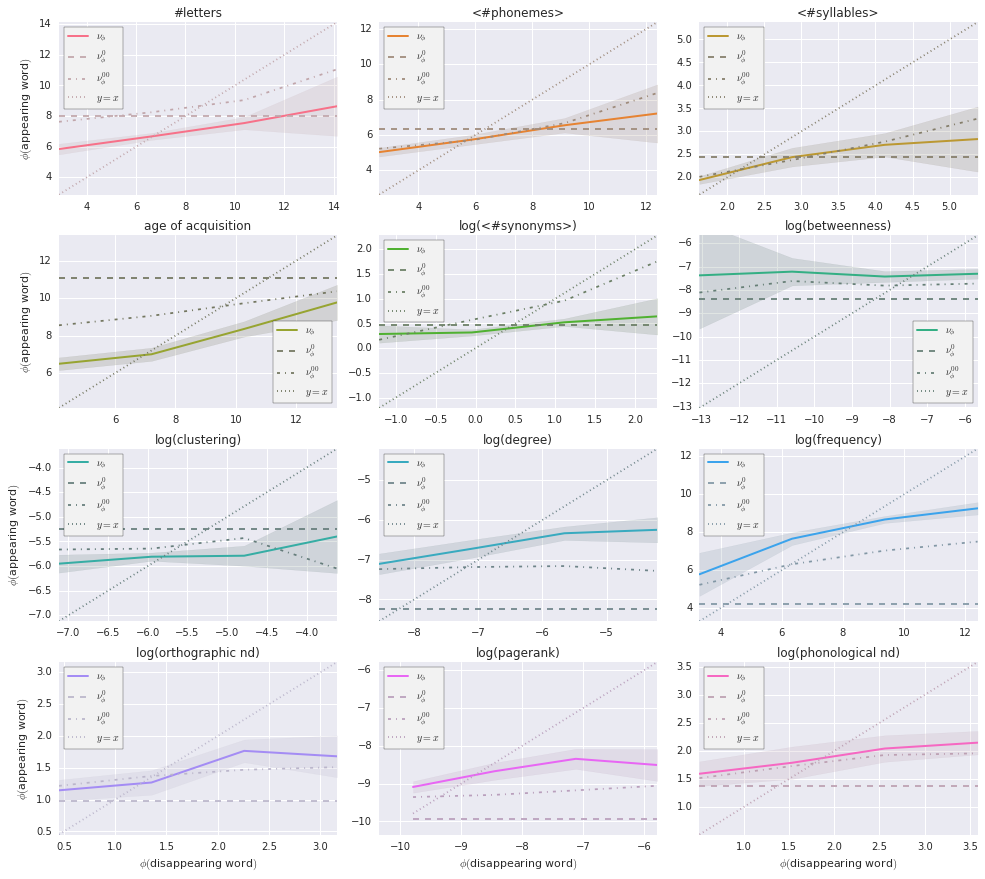

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

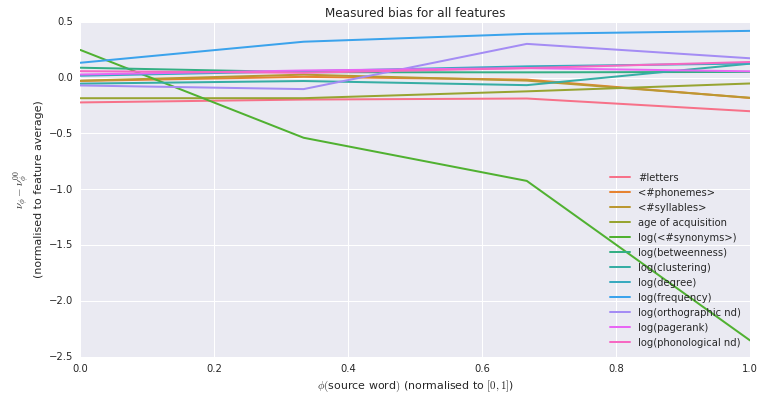

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |


H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | **  | ns. |


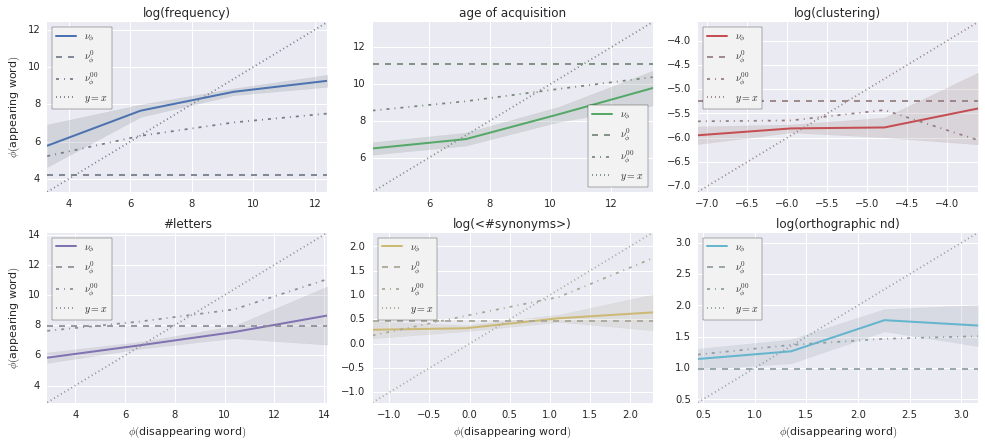

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

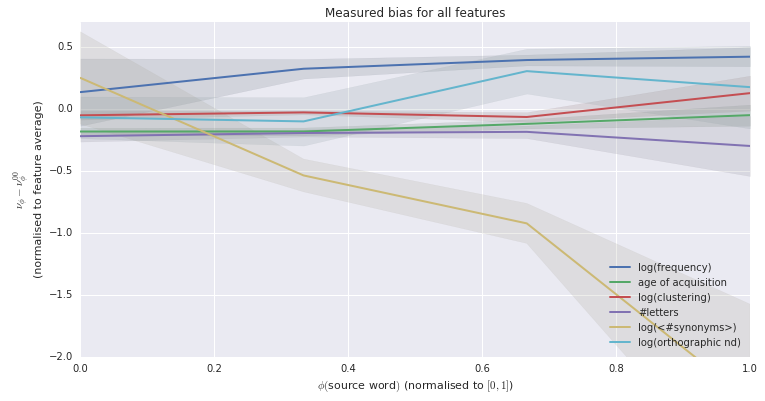

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | ns. |


H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | **  | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *   | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | ns. | ns. | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


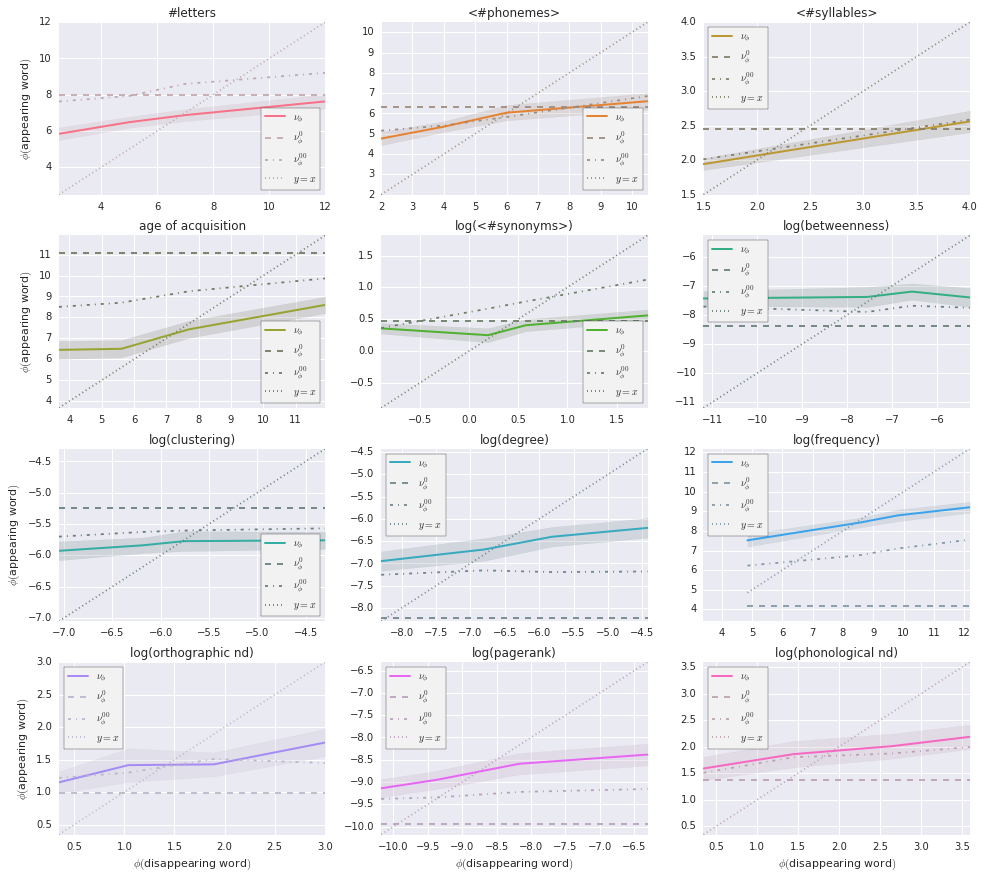

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

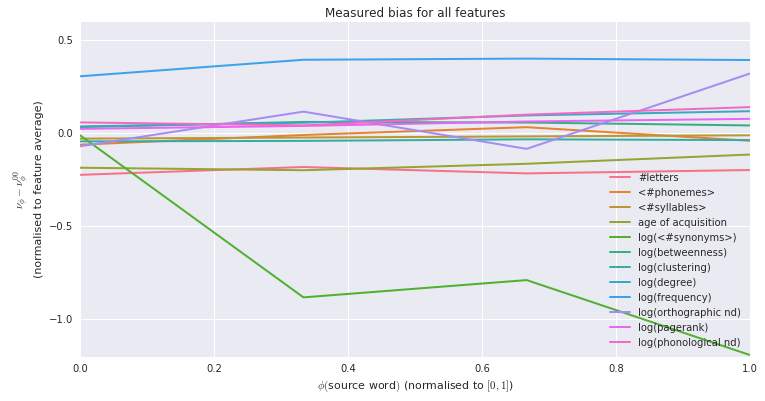

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *   | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | **  |


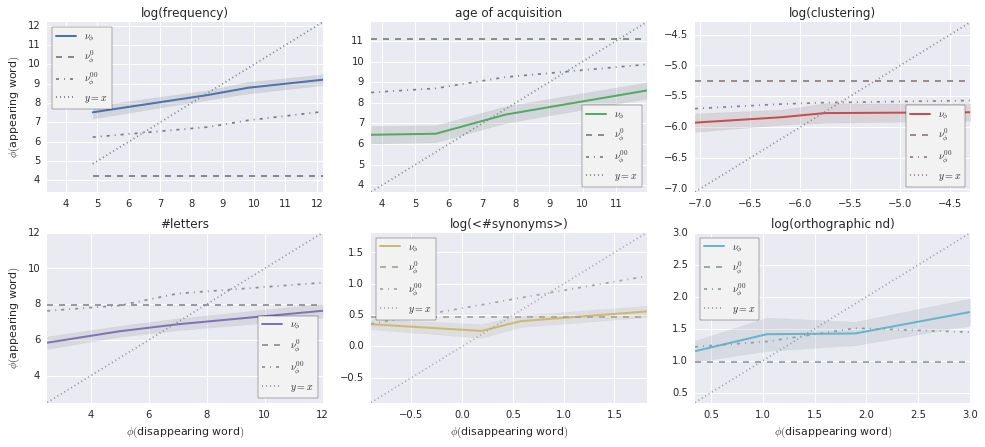

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

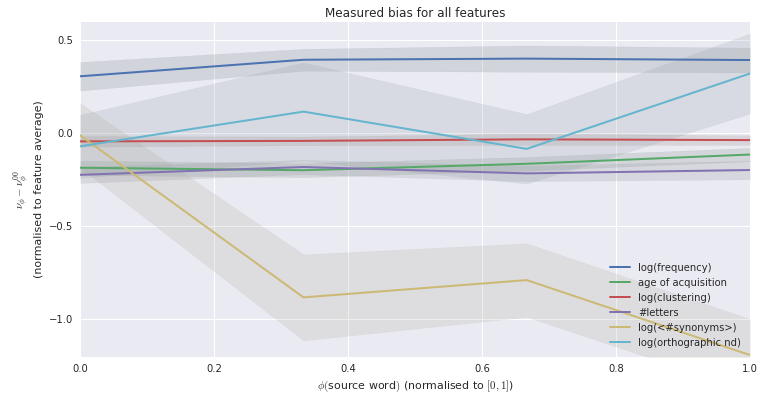

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | *   | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *   | ns. | ns. |
H_00 | ns. | *** | *** | **  |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |


H_00 | ns. | **  | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *   | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


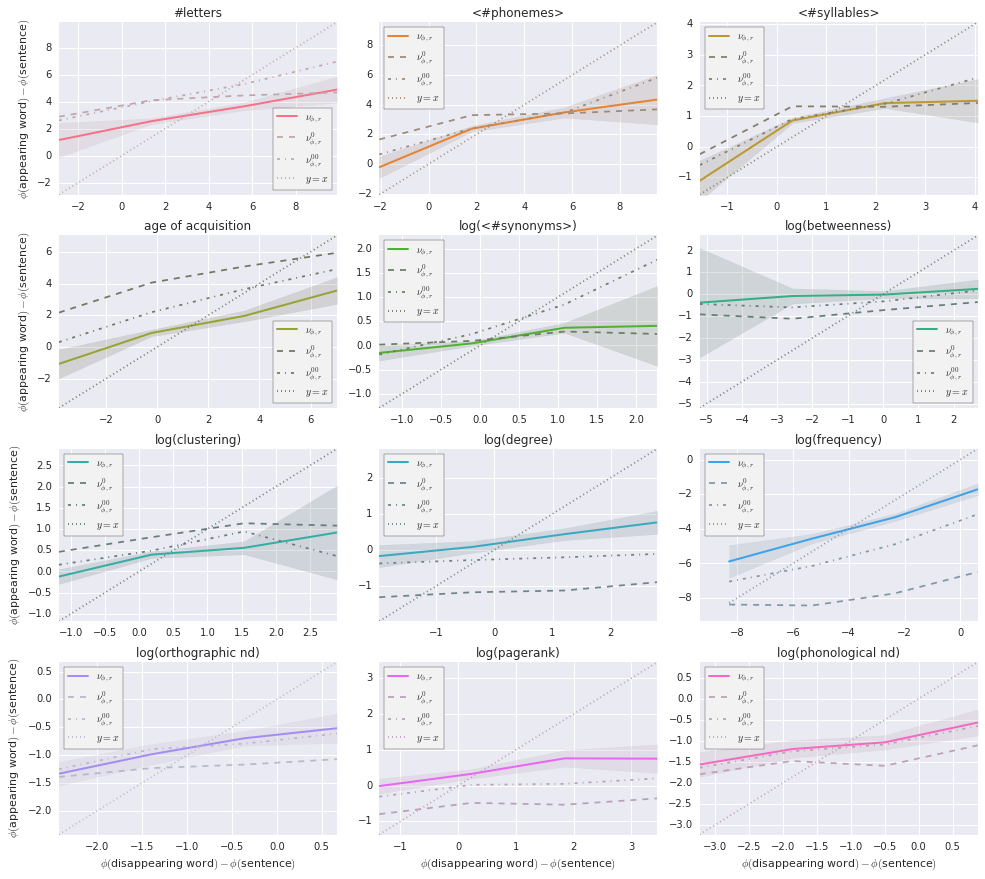

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

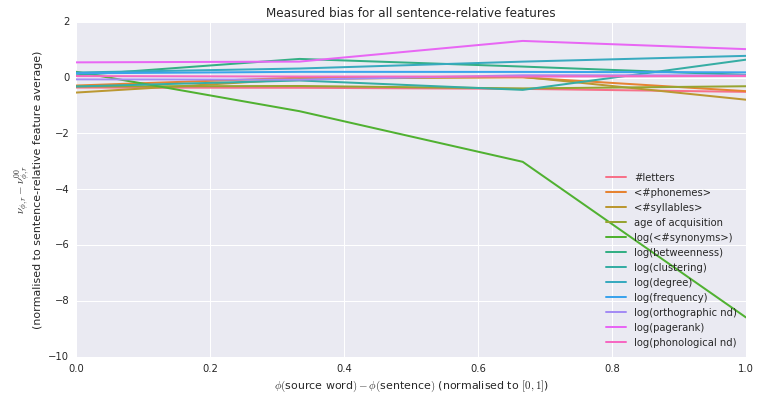

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *   | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | ns. |
H_00 | *   | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *   | ns. | ns. |
H_00 | ns. | *** | *** | **  |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


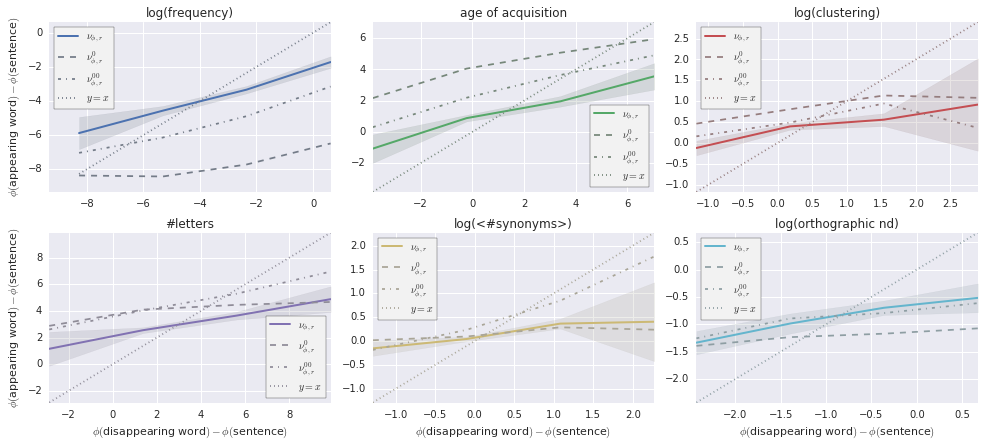

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

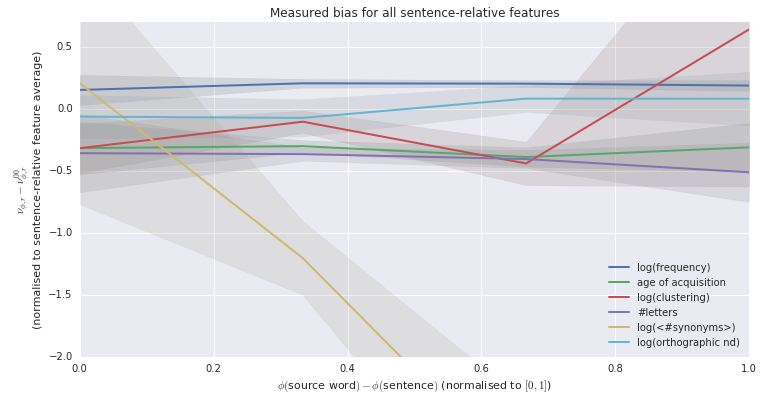

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | ns. | ns. |


H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |
H_00 | **  | ns. | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


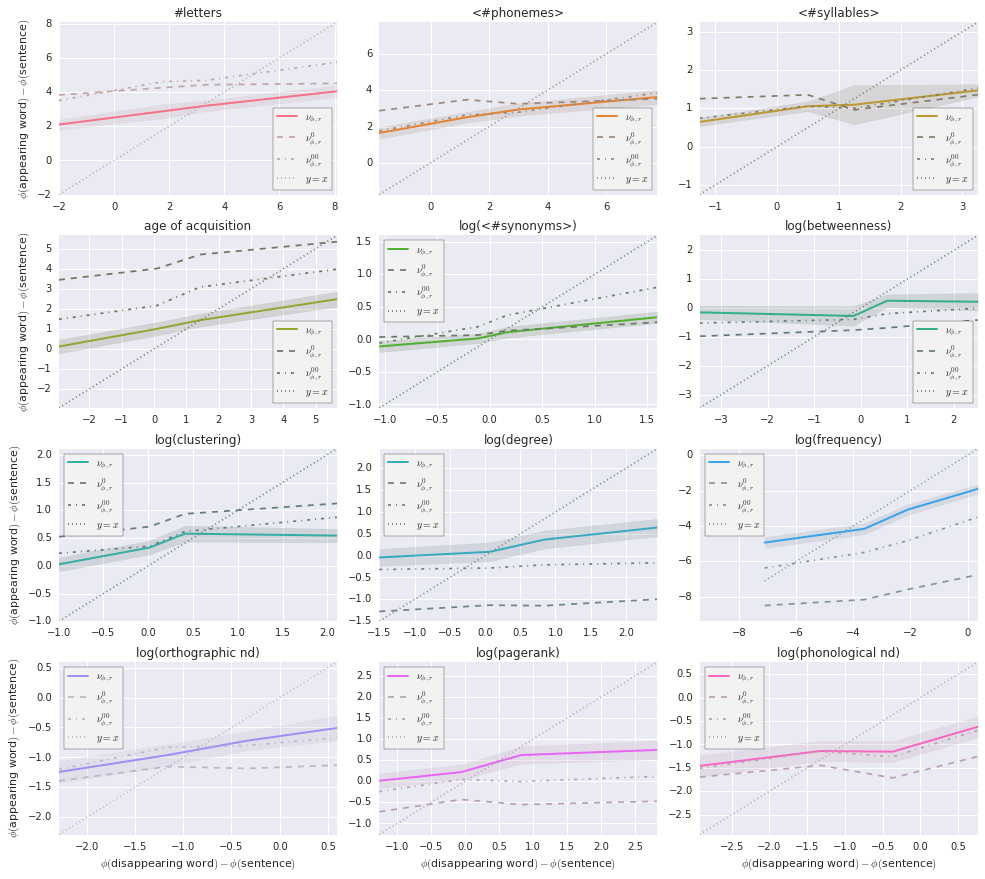

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

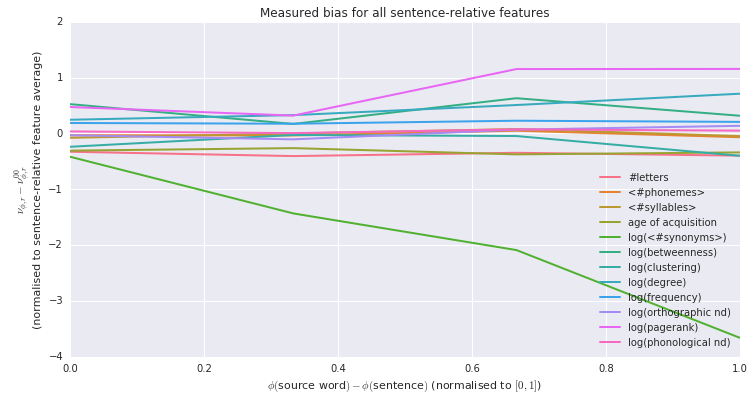

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | ns. | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


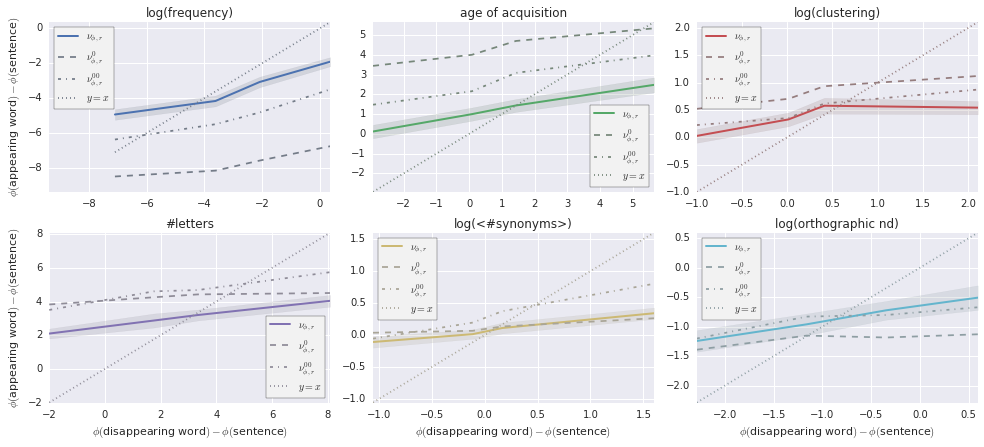

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

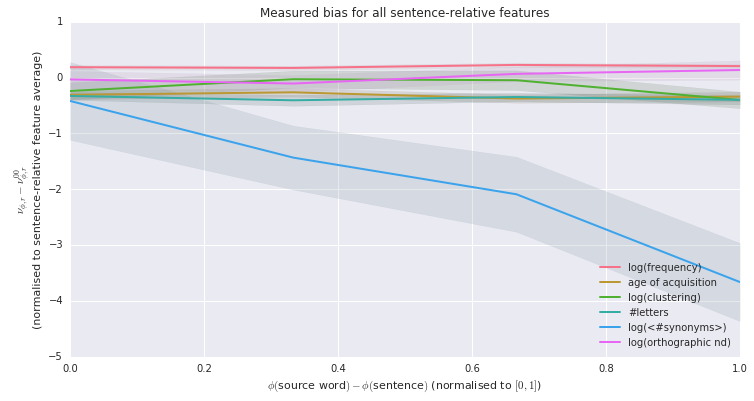

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


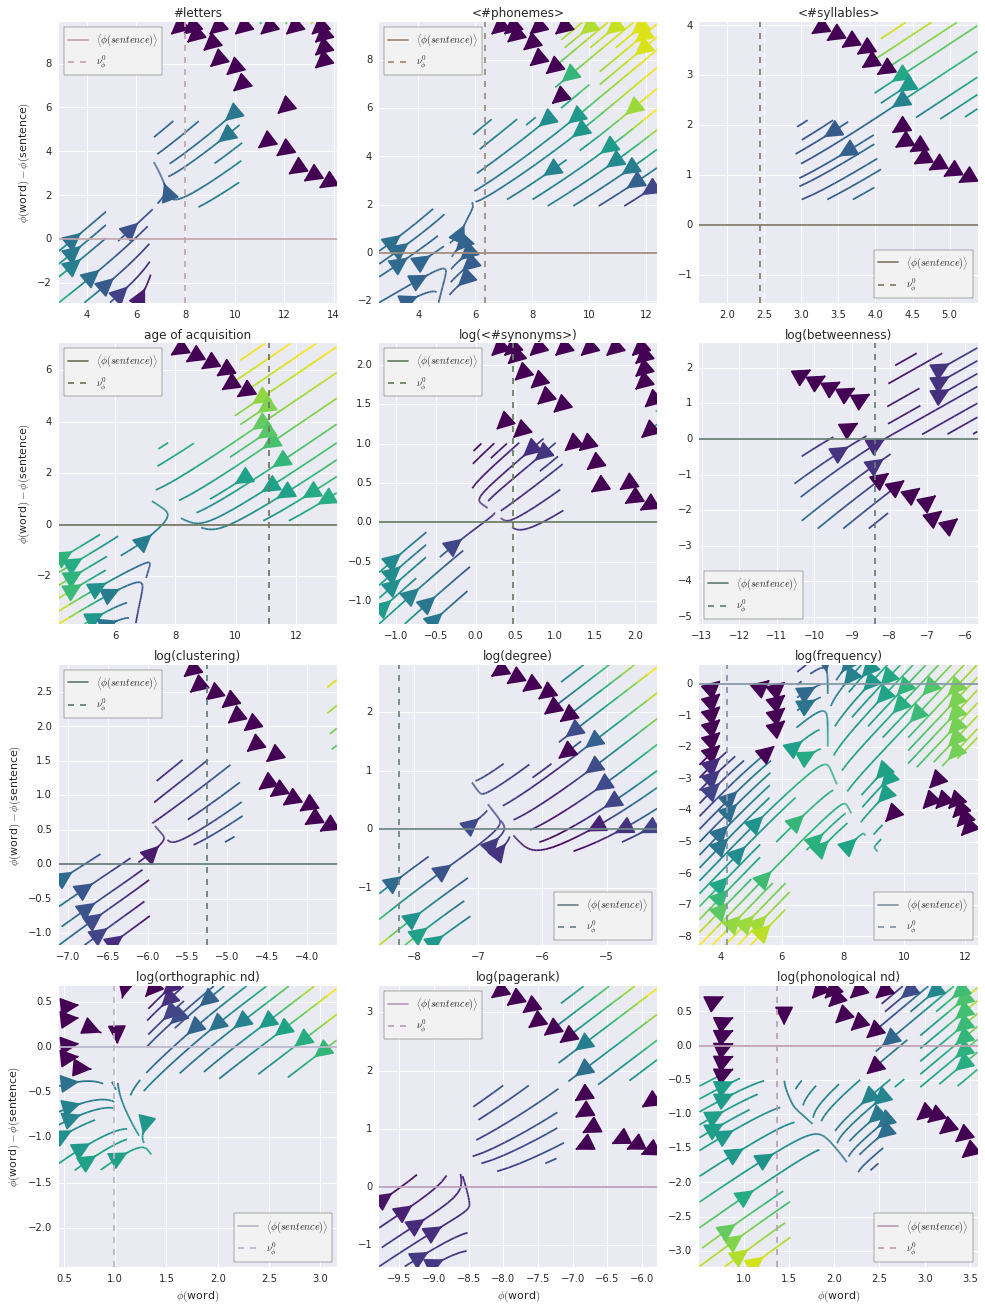

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


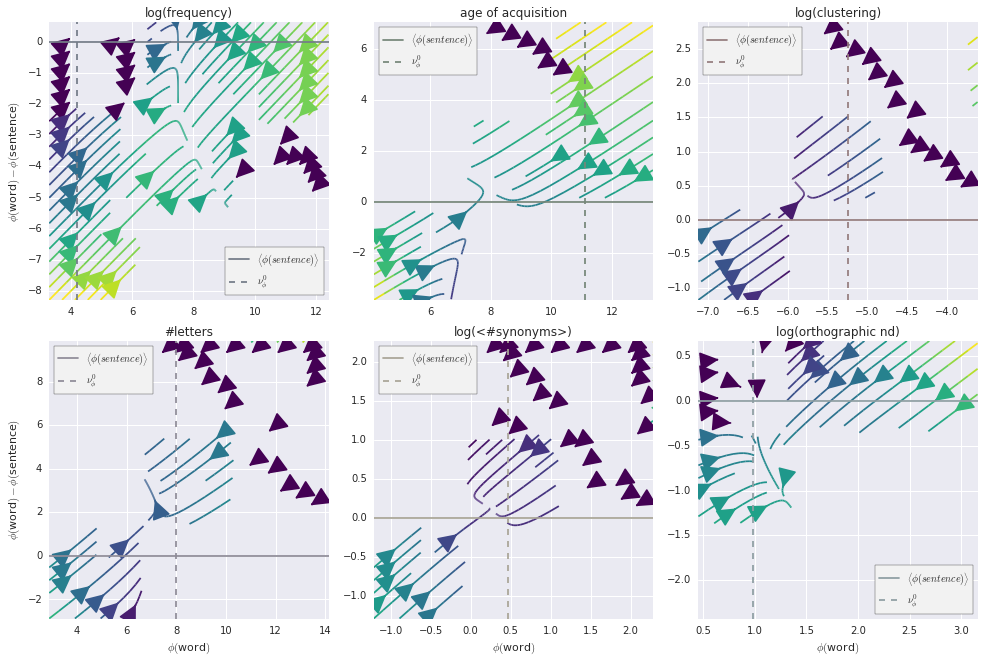

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54034524  0.16133351  0.08746155  0.07136385  0.03546255  0.03039217
  0.01970142  0.017005    0.01617424  0.00882725  0.00711032]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.424365,0.322792,-0.086371,0.253731,0.247127,-0.425529,0.232656,0.301246,-0.392979,0.282465,-0.150217,-0.008460
Component-1,0.295493,-0.378478,0.119609,-0.279861,-0.279761,-0.415574,0.159434,-0.309788,-0.459896,0.251741,-0.171270,0.015565
Component-2,-0.687100,-0.087009,0.120914,-0.048858,-0.698171,0.077989,0.020314,-0.025285,0.047699,-0.049860,-0.008755,0.062457


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 7196) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  19 of 7196) |                       | Elapsed Time: 0:00:42 ETA: 4:26:52

  0% (  49 of 7196) |                       | Elapsed Time: 0:00:42 ETA: 1:43:33

  1% (  79 of 7196) |                       | Elapsed Time: 0:00:42 ETA: 1:04:16

  1% ( 103 of 7196) |                       | Elapsed Time: 0:00:43 ETA: 0:49:22

  1% ( 135 of 7196) |                       | Elapsed Time: 0:00:43 ETA: 0:00:51

  2% ( 180 of 7196) |                       | Elapsed Time: 0:00:43 ETA: 0:00:49

  2% ( 212 of 7196) |                       | Elapsed Time: 0:00:43 ETA: 0:00:47

  3% ( 241 of 7196) |                       | Elapsed Time: 0:00:43 ETA: 0:00:46

  3% ( 270 of 7196) |                       | Elapsed Time: 0:00:44 ETA: 0:00:45

  4% ( 289 of 7196) |                       | Elapsed Time: 0:00:44 ETA: 0:00:50

  4% ( 307 of 7196) |                       | Elapsed Time: 0:00:44 ETA: 0:00:54

  4% ( 325 of 7196) |#                      | Elapsed Time: 0:00:44 ETA: 0:01:02

  4% ( 343 of 7196) |#                      | Elapsed Time: 0:00:44 ETA: 0:01:09

  5% ( 369 of 7196) |#                      | Elapsed Time: 0:00:45 ETA: 0:01:17

  5% ( 387 of 7196) |#                      | Elapsed Time: 0:00:45 ETA: 0:01:17

  5% ( 405 of 7196) |#                      | Elapsed Time: 0:00:45 ETA: 0:01:17

  5% ( 423 of 7196) |#                      | Elapsed Time: 0:00:45 ETA: 0:01:17

  6% ( 441 of 7196) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:16

  6% ( 459 of 7196) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:15

  6% ( 477 of 7196) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:15

  6% ( 495 of 7196) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:15

  7% ( 513 of 7196) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:15

  7% ( 531 of 7196) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:15

  7% ( 550 of 7196) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:15

  7% ( 569 of 7196) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:14

  8% ( 591 of 7196) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:11

  8% ( 612 of 7196) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:09

  8% ( 641 of 7196) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:06

  9% ( 668 of 7196) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:01

  9% ( 696 of 7196) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:57

 10% ( 734 of 7196) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:52

 10% ( 757 of 7196) |##                     | Elapsed Time: 0:00:49 ETA: 0:00:51

 10% ( 776 of 7196) |##                     | Elapsed Time: 0:00:49 ETA: 0:00:52

 11% ( 796 of 7196) |##                     | Elapsed Time: 0:00:49 ETA: 0:00:55

 11% ( 820 of 7196) |##                     | Elapsed Time: 0:00:49 ETA: 0:01:01

 11% ( 840 of 7196) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:07

 11% ( 859 of 7196) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:08

 12% ( 879 of 7196) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:07

 12% ( 916 of 7196) |##                     | Elapsed Time: 0:00:50 ETA: 0:00:59

 13% ( 947 of 7196) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:53

 13% ( 969 of 7196) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:52

 13% ( 990 of 7196) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:51

 14% (1008 of 7196) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:53

 14% (1028 of 7196) |###                    | Elapsed Time: 0:00:51 ETA: 0:01:01

 14% (1056 of 7196) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:59

 15% (1096 of 7196) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:52

 15% (1115 of 7196) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:52

 15% (1132 of 7196) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:52

 15% (1149 of 7196) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:56

 16% (1170 of 7196) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:04

 16% (1187 of 7196) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:14

 16% (1213 of 7196) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:06

 17% (1239 of 7196) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:00

 17% (1271 of 7196) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:56

 17% (1293 of 7196) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:52

 18% (1321 of 7196) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:50

 18% (1350 of 7196) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:52

 19% (1380 of 7196) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:48

 19% (1400 of 7196) |####                   | Elapsed Time: 0:00:56 ETA: 0:02:18

 19% (1426 of 7196) |####                   | Elapsed Time: 0:00:57 ETA: 0:02:15

 20% (1452 of 7196) |####                   | Elapsed Time: 0:00:57 ETA: 0:02:15

 20% (1479 of 7196) |####                   | Elapsed Time: 0:00:57 ETA: 0:02:22

 20% (1509 of 7196) |####                   | Elapsed Time: 0:00:57 ETA: 0:00:46

 21% (1542 of 7196) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:47

 21% (1562 of 7196) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:46

 22% (1589 of 7196) |#####                  | Elapsed Time: 0:00:58 ETA: 0:00:45

 22% (1620 of 7196) |#####                  | Elapsed Time: 0:00:58 ETA: 0:00:45

 22% (1644 of 7196) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:49

 23% (1667 of 7196) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:48

 23% (1691 of 7196) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:47

 23% (1721 of 7196) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:49

 24% (1743 of 7196) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:49

 24% (1770 of 7196) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:47

 25% (1800 of 7196) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:47

 25% (1822 of 7196) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:47

 25% (1845 of 7196) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:46

 26% (1889 of 7196) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:43

 26% (1921 of 7196) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:40

 27% (1952 of 7196) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:37

 27% (1979 of 7196) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:36

 27% (2003 of 7196) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:37

 28% (2034 of 7196) |######                 | Elapsed Time: 0:01:02 ETA: 0:00:37

 28% (2069 of 7196) |######                 | Elapsed Time: 0:01:02 ETA: 0:00:38

 29% (2091 of 7196) |######                 | Elapsed Time: 0:01:02 ETA: 0:00:40

 29% (2118 of 7196) |######                 | Elapsed Time: 0:01:02 ETA: 0:00:39

 30% (2159 of 7196) |######                 | Elapsed Time: 0:01:03 ETA: 0:00:38

 30% (2184 of 7196) |######                 | Elapsed Time: 0:01:03 ETA: 0:00:39

 30% (2207 of 7196) |#######                | Elapsed Time: 0:01:03 ETA: 0:00:40

 31% (2235 of 7196) |#######                | Elapsed Time: 0:01:03 ETA: 0:00:38

 31% (2262 of 7196) |#######                | Elapsed Time: 0:01:04 ETA: 0:00:39

 31% (2292 of 7196) |#######                | Elapsed Time: 0:01:04 ETA: 0:00:40

 32% (2316 of 7196) |#######                | Elapsed Time: 0:01:04 ETA: 0:00:39

 32% (2351 of 7196) |#######                | Elapsed Time: 0:01:04 ETA: 0:00:39

 33% (2375 of 7196) |#######                | Elapsed Time: 0:01:04 ETA: 0:00:39

 33% (2395 of 7196) |#######                | Elapsed Time: 0:01:05 ETA: 0:00:41

 33% (2414 of 7196) |#######                | Elapsed Time: 0:01:05 ETA: 0:00:44

 33% (2440 of 7196) |#######                | Elapsed Time: 0:01:05 ETA: 0:00:44

 34% (2465 of 7196) |#######                | Elapsed Time: 0:01:05 ETA: 0:00:45

 34% (2488 of 7196) |#######                | Elapsed Time: 0:01:06 ETA: 0:00:45

 35% (2519 of 7196) |########               | Elapsed Time: 0:01:06 ETA: 0:00:42

 35% (2546 of 7196) |########               | Elapsed Time: 0:01:06 ETA: 0:00:39

 35% (2572 of 7196) |########               | Elapsed Time: 0:01:06 ETA: 0:00:38

 36% (2609 of 7196) |########               | Elapsed Time: 0:01:06 ETA: 0:00:37

 36% (2638 of 7196) |########               | Elapsed Time: 0:01:07 ETA: 0:00:34

 37% (2664 of 7196) |########               | Elapsed Time: 0:01:07 ETA: 0:00:33

 37% (2689 of 7196) |########               | Elapsed Time: 0:01:07 ETA: 0:00:34

 37% (2708 of 7196) |########               | Elapsed Time: 0:01:07 ETA: 0:00:37

 37% (2734 of 7196) |########               | Elapsed Time: 0:01:08 ETA: 0:00:38

 38% (2756 of 7196) |########               | Elapsed Time: 0:01:08 ETA: 0:00:40

 38% (2780 of 7196) |########               | Elapsed Time: 0:01:08 ETA: 0:00:41

 38% (2802 of 7196) |########               | Elapsed Time: 0:01:08 ETA: 0:00:41

 39% (2828 of 7196) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:38

 39% (2856 of 7196) |#########              | Elapsed Time: 0:01:09 ETA: 0:00:37

 40% (2892 of 7196) |#########              | Elapsed Time: 0:01:09 ETA: 0:00:34

 40% (2914 of 7196) |#########              | Elapsed Time: 0:01:09 ETA: 0:00:34

 40% (2937 of 7196) |#########              | Elapsed Time: 0:01:09 ETA: 0:00:34

 41% (2969 of 7196) |#########              | Elapsed Time: 0:01:10 ETA: 0:00:36

 41% (2996 of 7196) |#########              | Elapsed Time: 0:01:10 ETA: 0:00:36

 41% (3014 of 7196) |#########              | Elapsed Time: 0:01:10 ETA: 0:00:38

 42% (3059 of 7196) |#########              | Elapsed Time: 0:01:10 ETA: 0:00:35

 42% (3084 of 7196) |#########              | Elapsed Time: 0:01:10 ETA: 0:00:34

 43% (3109 of 7196) |#########              | Elapsed Time: 0:01:11 ETA: 0:00:32

 43% (3131 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:33

 43% (3164 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:32

 44% (3198 of 7196) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:31

 44% (3216 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:34

 45% (3239 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:35

 45% (3269 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:32

 45% (3292 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:34

 45% (3310 of 7196) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:37

 46% (3343 of 7196) |##########             | Elapsed Time: 0:01:13 ETA: 0:00:34

 46% (3367 of 7196) |##########             | Elapsed Time: 0:01:13 ETA: 0:00:33

 47% (3385 of 7196) |##########             | Elapsed Time: 0:01:13 ETA: 0:00:37

 47% (3395 of 7196) |##########             | Elapsed Time: 0:01:13 ETA: 0:00:40

 47% (3419 of 7196) |##########             | Elapsed Time: 0:01:14 ETA: 0:00:38

 47% (3447 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:38

 48% (3467 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:40

 48% (3493 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:33

 48% (3523 of 7196) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:29

 49% (3550 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:29

 49% (3579 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:29

 50% (3599 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:29

 50% (3620 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:30

 50% (3638 of 7196) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:33

 50% (3669 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:31

 51% (3706 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:29

 51% (3733 of 7196) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:27

 52% (3760 of 7196) |############           | Elapsed Time: 0:01:16 ETA: 0:00:26

 52% (3778 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:27

 52% (3796 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:29

 53% (3818 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:33

 53% (3838 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:35

 53% (3868 of 7196) |############           | Elapsed Time: 0:01:17 ETA: 0:00:31

 54% (3898 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:27

 54% (3926 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:25

 55% (3958 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:23

 55% (3984 of 7196) |############           | Elapsed Time: 0:01:18 ETA: 0:00:22

 55% (4000 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:26

 55% (4010 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:31

 55% (4020 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:39

 56% (4030 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:52

 56% (4048 of 7196) |############           | Elapsed Time: 0:01:19 ETA: 0:00:57

 56% (4072 of 7196) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:44

 56% (4090 of 7196) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:39

 57% (4118 of 7196) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:31

 57% (4147 of 7196) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:28

 57% (4163 of 7196) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:30

 58% (4180 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:31

 58% (4212 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:28

 58% (4241 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:26

 59% (4267 of 7196) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:25

 59% (4294 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:21

 60% (4318 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:22

 60% (4346 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:22

 60% (4377 of 7196) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:21

 61% (4408 of 7196) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:21

 61% (4438 of 7196) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:20

 62% (4463 of 7196) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:19

 62% (4483 of 7196) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:21

 62% (4508 of 7196) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:23

 63% (4538 of 7196) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:23

 63% (4558 of 7196) |##############         | Elapsed Time: 0:01:24 ETA: 0:00:24

 63% (4588 of 7196) |##############         | Elapsed Time: 0:01:24 ETA: 0:00:23

 64% (4622 of 7196) |##############         | Elapsed Time: 0:01:24 ETA: 0:00:20

 64% (4653 of 7196) |##############         | Elapsed Time: 0:01:24 ETA: 0:00:19

 65% (4693 of 7196) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:18

 65% (4722 of 7196) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:17

 65% (4745 of 7196) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:18

 66% (4782 of 7196) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:18

 66% (4810 of 7196) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:18

 67% (4837 of 7196) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:18

 67% (4871 of 7196) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:18

 68% (4897 of 7196) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:18

 68% (4925 of 7196) |###############        | Elapsed Time: 0:01:27 ETA: 0:00:17

 68% (4948 of 7196) |###############        | Elapsed Time: 0:01:27 ETA: 0:00:19

 69% (4971 of 7196) |###############        | Elapsed Time: 0:01:27 ETA: 0:00:19

 69% (4997 of 7196) |###############        | Elapsed Time: 0:01:27 ETA: 0:00:19

 69% (5014 of 7196) |################       | Elapsed Time: 0:01:27 ETA: 0:00:21

 70% (5050 of 7196) |################       | Elapsed Time: 0:01:28 ETA: 0:00:19

 70% (5079 of 7196) |################       | Elapsed Time: 0:01:28 ETA: 0:00:17

 70% (5106 of 7196) |################       | Elapsed Time: 0:01:28 ETA: 0:00:17

 71% (5128 of 7196) |################       | Elapsed Time: 0:01:28 ETA: 0:00:17

 71% (5153 of 7196) |################       | Elapsed Time: 0:01:29 ETA: 0:00:17

 71% (5179 of 7196) |################       | Elapsed Time: 0:01:29 ETA: 0:00:17

 72% (5204 of 7196) |################       | Elapsed Time: 0:01:29 ETA: 0:00:17

 72% (5228 of 7196) |################       | Elapsed Time: 0:01:29 ETA: 0:00:17

 73% (5254 of 7196) |################       | Elapsed Time: 0:01:29 ETA: 0:00:16

 73% (5276 of 7196) |################       | Elapsed Time: 0:01:30 ETA: 0:00:16

 73% (5308 of 7196) |################       | Elapsed Time: 0:01:30 ETA: 0:00:16

 74% (5334 of 7196) |#################      | Elapsed Time: 0:01:30 ETA: 0:00:15

 74% (5363 of 7196) |#################      | Elapsed Time: 0:01:30 ETA: 0:00:14

 75% (5398 of 7196) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:14

 75% (5422 of 7196) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:14

 75% (5447 of 7196) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:14

 75% (5468 of 7196) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:15

 76% (5500 of 7196) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:14

 76% (5530 of 7196) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:14

 77% (5552 of 7196) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:14

 77% (5577 of 7196) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:13

 77% (5599 of 7196) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:13

 78% (5617 of 7196) |#################      | Elapsed Time: 0:01:33 ETA: 0:00:14

 78% (5640 of 7196) |##################     | Elapsed Time: 0:01:33 ETA: 0:00:14

 78% (5667 of 7196) |##################     | Elapsed Time: 0:01:33 ETA: 0:00:14

 79% (5694 of 7196) |##################     | Elapsed Time: 0:01:33 ETA: 0:00:14

 79% (5717 of 7196) |##################     | Elapsed Time: 0:01:33 ETA: 0:00:12

 79% (5745 of 7196) |##################     | Elapsed Time: 0:01:34 ETA: 0:00:12

 80% (5769 of 7196) |##################     | Elapsed Time: 0:01:34 ETA: 0:00:11

 80% (5789 of 7196) |##################     | Elapsed Time: 0:01:34 ETA: 0:00:12

 80% (5807 of 7196) |##################     | Elapsed Time: 0:01:34 ETA: 0:00:13

 81% (5833 of 7196) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:12

 81% (5863 of 7196) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:12

 81% (5890 of 7196) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:11

 82% (5918 of 7196) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:09

 82% (5948 of 7196) |###################    | Elapsed Time: 0:01:35 ETA: 0:00:09

 82% (5963 of 7196) |###################    | Elapsed Time: 0:01:36 ETA: 0:00:10

 83% (5991 of 7196) |###################    | Elapsed Time: 0:01:36 ETA: 0:00:10

 83% (6027 of 7196) |###################    | Elapsed Time: 0:01:36 ETA: 0:00:10

 84% (6057 of 7196) |###################    | Elapsed Time: 0:01:36 ETA: 0:00:09

 84% (6083 of 7196) |###################    | Elapsed Time: 0:01:37 ETA: 0:00:08

 85% (6117 of 7196) |###################    | Elapsed Time: 0:01:37 ETA: 0:00:08

 85% (6146 of 7196) |###################    | Elapsed Time: 0:01:37 ETA: 0:00:07

 85% (6169 of 7196) |###################    | Elapsed Time: 0:01:37 ETA: 0:00:07

 86% (6207 of 7196) |###################    | Elapsed Time: 0:01:37 ETA: 0:00:07

 86% (6235 of 7196) |###################    | Elapsed Time: 0:01:38 ETA: 0:00:07

 87% (6262 of 7196) |####################   | Elapsed Time: 0:01:38 ETA: 0:00:06

 87% (6297 of 7196) |####################   | Elapsed Time: 0:01:38 ETA: 0:00:06

 87% (6325 of 7196) |####################   | Elapsed Time: 0:01:38 ETA: 0:00:06

 88% (6351 of 7196) |####################   | Elapsed Time: 0:01:39 ETA: 0:00:06

 88% (6387 of 7196) |####################   | Elapsed Time: 0:01:39 ETA: 0:00:05

 89% (6418 of 7196) |####################   | Elapsed Time: 0:01:39 ETA: 0:00:05

 89% (6441 of 7196) |####################   | Elapsed Time: 0:01:39 ETA: 0:00:05

 89% (6466 of 7196) |####################   | Elapsed Time: 0:01:39 ETA: 0:00:05

 90% (6493 of 7196) |####################   | Elapsed Time: 0:01:40 ETA: 0:00:05

 90% (6513 of 7196) |####################   | Elapsed Time: 0:01:40 ETA: 0:00:05

 90% (6532 of 7196) |####################   | Elapsed Time: 0:01:40 ETA: 0:00:06

 91% (6567 of 7196) |####################   | Elapsed Time: 0:01:40 ETA: 0:00:05

 91% (6592 of 7196) |#####################  | Elapsed Time: 0:01:41 ETA: 0:00:05

 91% (6611 of 7196) |#####################  | Elapsed Time: 0:01:41 ETA: 0:00:05

 92% (6630 of 7196) |#####################  | Elapsed Time: 0:01:41 ETA: 0:00:05

 92% (6646 of 7196) |#####################  | Elapsed Time: 0:01:41 ETA: 0:00:05

 92% (6671 of 7196) |#####################  | Elapsed Time: 0:01:41 ETA: 0:00:05

 93% (6699 of 7196) |#####################  | Elapsed Time: 0:01:42 ETA: 0:00:04

 93% (6728 of 7196) |#####################  | Elapsed Time: 0:01:42 ETA: 0:00:03

 93% (6747 of 7196) |#####################  | Elapsed Time: 0:01:42 ETA: 0:00:03

 94% (6776 of 7196) |#####################  | Elapsed Time: 0:01:42 ETA: 0:00:03

 94% (6802 of 7196) |#####################  | Elapsed Time: 0:01:42 ETA: 0:00:03

 95% (6837 of 7196) |#####################  | Elapsed Time: 0:01:43 ETA: 0:00:02

 95% (6857 of 7196) |#####################  | Elapsed Time: 0:01:43 ETA: 0:00:02

 95% (6885 of 7196) |###################### | Elapsed Time: 0:01:43 ETA: 0:00:02

 96% (6911 of 7196) |###################### | Elapsed Time: 0:01:43 ETA: 0:00:02

 96% (6935 of 7196) |###################### | Elapsed Time: 0:01:44 ETA: 0:00:02

 96% (6948 of 7196) |###################### | Elapsed Time: 0:01:44 ETA: 0:00:02

 96% (6970 of 7196) |###################### | Elapsed Time: 0:01:44 ETA: 0:00:02

 97% (6997 of 7196) |###################### | Elapsed Time: 0:01:44 ETA: 0:00:02

 97% (7028 of 7196) |###################### | Elapsed Time: 0:01:45 ETA: 0:00:01

 97% (7052 of 7196) |###################### | Elapsed Time: 0:01:45 ETA: 0:00:01

 98% (7073 of 7196) |###################### | Elapsed Time: 0:01:45 ETA: 0:00:01

 98% (7107 of 7196) |###################### | Elapsed Time: 0:01:45 ETA: 0:00:00

 99% (7134 of 7196) |###################### | Elapsed Time: 0:01:45 ETA: 0:00:00

 99% (7158 of 7196) |###################### | Elapsed Time: 0:01:46 ETA: 0:00:00

100% (7196 of 7196) |######################| Elapsed Time: 0:01:46 Time: 0:01:46


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *   | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | ns. | ns. | *   | ns. |


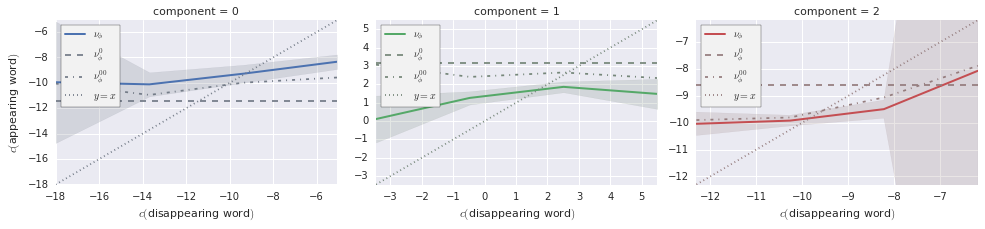

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 1 components.

Those explain the following variance:
[ 0.67099834]



,aoa,frequency,letters_count
Component-0,-0.73038,0.351168,-0.585855


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 7196) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  17 of 7196) |                       | Elapsed Time: 0:00:01 ETA: 0:12:08

  0% (  54 of 7196) |                       | Elapsed Time: 0:00:01 ETA: 0:04:15

  1% ( 108 of 7196) |                       | Elapsed Time: 0:00:02 ETA: 0:02:26

  2% ( 146 of 7196) |                       | Elapsed Time: 0:00:02 ETA: 0:01:57

  2% ( 198 of 7196) |                       | Elapsed Time: 0:00:02 ETA: 0:00:39

  3% ( 237 of 7196) |                       | Elapsed Time: 0:00:02 ETA: 0:00:37

  3% ( 285 of 7196) |                       | Elapsed Time: 0:00:03 ETA: 0:00:39

  4% ( 313 of 7196) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:40

  4% ( 340 of 7196) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:42

  5% ( 375 of 7196) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:45

  5% ( 404 of 7196) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:48

  6% ( 433 of 7196) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:49

  6% ( 465 of 7196) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:48

  6% ( 494 of 7196) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:47

  7% ( 523 of 7196) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:47

  7% ( 555 of 7196) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:47

  8% ( 586 of 7196) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:46

  8% ( 630 of 7196) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:45

  9% ( 665 of 7196) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:42

  9% ( 701 of 7196) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:40

 10% ( 740 of 7196) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:38

 10% ( 774 of 7196) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:37

 11% ( 810 of 7196) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:36

 11% ( 844 of 7196) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:37

 12% ( 878 of 7196) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:37

 12% ( 920 of 7196) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:37

 13% ( 959 of 7196) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:35

 13% (1007 of 7196) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:35

 14% (1042 of 7196) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:35

 15% (1080 of 7196) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:34

 15% (1115 of 7196) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:35

 15% (1144 of 7196) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:36

 16% (1185 of 7196) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:37

 16% (1223 of 7196) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:37

 17% (1260 of 7196) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:37

 18% (1296 of 7196) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:36

 18% (1332 of 7196) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:34

 19% (1369 of 7196) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:32

 19% (1406 of 7196) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:32

 20% (1459 of 7196) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:32

 20% (1499 of 7196) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:31

 21% (1548 of 7196) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:30

 22% (1584 of 7196) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:30

 22% (1638 of 7196) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:30

 23% (1675 of 7196) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:30

 23% (1710 of 7196) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:30

 24% (1747 of 7196) |#####                  | Elapsed Time: 0:00:12 ETA: 0:00:30

 25% (1800 of 7196) |#####                  | Elapsed Time: 0:00:12 ETA: 0:00:29

 25% (1837 of 7196) |#####                  | Elapsed Time: 0:00:12 ETA: 0:00:29

 26% (1889 of 7196) |######                 | Elapsed Time: 0:00:12 ETA: 0:00:29

 26% (1930 of 7196) |######                 | Elapsed Time: 0:00:13 ETA: 0:00:27

 27% (1979 of 7196) |######                 | Elapsed Time: 0:00:13 ETA: 0:00:27

 28% (2020 of 7196) |######                 | Elapsed Time: 0:00:13 ETA: 0:00:26

 28% (2069 of 7196) |######                 | Elapsed Time: 0:00:13 ETA: 0:00:26

 29% (2106 of 7196) |######                 | Elapsed Time: 0:00:13 ETA: 0:00:26

 30% (2159 of 7196) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:26

 30% (2198 of 7196) |#######                | Elapsed Time: 0:00:14 ETA: 0:00:25

 31% (2249 of 7196) |#######                | Elapsed Time: 0:00:14 ETA: 0:00:25

 31% (2288 of 7196) |#######                | Elapsed Time: 0:00:14 ETA: 0:00:25

 32% (2339 of 7196) |#######                | Elapsed Time: 0:00:15 ETA: 0:00:25

 32% (2374 of 7196) |#######                | Elapsed Time: 0:00:15 ETA: 0:00:26

 33% (2407 of 7196) |#######                | Elapsed Time: 0:00:15 ETA: 0:00:27

 34% (2447 of 7196) |#######                | Elapsed Time: 0:00:15 ETA: 0:00:27

 34% (2483 of 7196) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:27

 35% (2539 of 7196) |########               | Elapsed Time: 0:00:16 ETA: 0:00:26

 35% (2579 of 7196) |########               | Elapsed Time: 0:00:16 ETA: 0:00:25

 36% (2629 of 7196) |########               | Elapsed Time: 0:00:16 ETA: 0:00:24

 37% (2667 of 7196) |########               | Elapsed Time: 0:00:17 ETA: 0:00:23

 37% (2717 of 7196) |########               | Elapsed Time: 0:00:17 ETA: 0:00:23

 38% (2756 of 7196) |########               | Elapsed Time: 0:00:17 ETA: 0:00:23

 39% (2808 of 7196) |########               | Elapsed Time: 0:00:17 ETA: 0:00:23

 39% (2847 of 7196) |#########              | Elapsed Time: 0:00:17 ETA: 0:00:23

 40% (2899 of 7196) |#########              | Elapsed Time: 0:00:18 ETA: 0:00:22

 40% (2938 of 7196) |#########              | Elapsed Time: 0:00:18 ETA: 0:00:22

 41% (2989 of 7196) |#########              | Elapsed Time: 0:00:18 ETA: 0:00:22

 42% (3026 of 7196) |#########              | Elapsed Time: 0:00:18 ETA: 0:00:21

 42% (3078 of 7196) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:21

 43% (3114 of 7196) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:22

 44% (3168 of 7196) |##########             | Elapsed Time: 0:00:19 ETA: 0:00:21

 44% (3206 of 7196) |##########             | Elapsed Time: 0:00:19 ETA: 0:00:21

 45% (3239 of 7196) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:22

 45% (3279 of 7196) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:21

 46% (3329 of 7196) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:21

 46% (3365 of 7196) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:21

 47% (3396 of 7196) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:22

 47% (3440 of 7196) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:21

 48% (3476 of 7196) |###########            | Elapsed Time: 0:00:21 ETA: 0:00:21

 49% (3529 of 7196) |###########            | Elapsed Time: 0:00:21 ETA: 0:00:20

 49% (3568 of 7196) |###########            | Elapsed Time: 0:00:21 ETA: 0:00:19

 50% (3617 of 7196) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:19

 50% (3653 of 7196) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:19

 51% (3708 of 7196) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:18

 52% (3748 of 7196) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:18

 52% (3795 of 7196) |############           | Elapsed Time: 0:00:23 ETA: 0:00:18

 53% (3832 of 7196) |############           | Elapsed Time: 0:00:23 ETA: 0:00:18

 54% (3889 of 7196) |############           | Elapsed Time: 0:00:23 ETA: 0:00:17

 54% (3930 of 7196) |############           | Elapsed Time: 0:00:23 ETA: 0:00:17

 55% (3978 of 7196) |############           | Elapsed Time: 0:00:24 ETA: 0:00:16

 55% (4010 of 7196) |############           | Elapsed Time: 0:00:24 ETA: 0:00:17

 56% (4048 of 7196) |############           | Elapsed Time: 0:00:24 ETA: 0:00:17

 56% (4086 of 7196) |#############          | Elapsed Time: 0:00:24 ETA: 0:00:18

 57% (4138 of 7196) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:18

 57% (4172 of 7196) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:18

 58% (4228 of 7196) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:16

 59% (4269 of 7196) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:15

 60% (4318 of 7196) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:14

 60% (4359 of 7196) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:14

 61% (4408 of 7196) |##############         | Elapsed Time: 0:00:26 ETA: 0:00:13

 61% (4449 of 7196) |##############         | Elapsed Time: 0:00:26 ETA: 0:00:13

 62% (4498 of 7196) |##############         | Elapsed Time: 0:00:26 ETA: 0:00:13

 63% (4539 of 7196) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:13

 63% (4588 of 7196) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:13

 64% (4632 of 7196) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:13

 65% (4678 of 7196) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:12

 65% (4720 of 7196) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:12

 66% (4768 of 7196) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:11

 66% (4809 of 7196) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:11

 67% (4858 of 7196) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:11

 68% (4898 of 7196) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:11

 68% (4948 of 7196) |###############        | Elapsed Time: 0:00:29 ETA: 0:00:11

 69% (4987 of 7196) |###############        | Elapsed Time: 0:00:29 ETA: 0:00:11

 70% (5038 of 7196) |################       | Elapsed Time: 0:00:29 ETA: 0:00:11

 70% (5078 of 7196) |################       | Elapsed Time: 0:00:29 ETA: 0:00:11

 71% (5128 of 7196) |################       | Elapsed Time: 0:00:30 ETA: 0:00:11

 71% (5169 of 7196) |################       | Elapsed Time: 0:00:30 ETA: 0:00:10

 72% (5218 of 7196) |################       | Elapsed Time: 0:00:30 ETA: 0:00:10

 73% (5258 of 7196) |################       | Elapsed Time: 0:00:30 ETA: 0:00:09

 73% (5308 of 7196) |################       | Elapsed Time: 0:00:31 ETA: 0:00:09

 74% (5350 of 7196) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:09

 75% (5398 of 7196) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:09

 75% (5439 of 7196) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:08

 76% (5487 of 7196) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:08

 76% (5528 of 7196) |#################      | Elapsed Time: 0:00:32 ETA: 0:00:08

 77% (5577 of 7196) |#################      | Elapsed Time: 0:00:32 ETA: 0:00:08

 78% (5614 of 7196) |#################      | Elapsed Time: 0:00:32 ETA: 0:00:08

 78% (5667 of 7196) |##################     | Elapsed Time: 0:00:32 ETA: 0:00:08

 79% (5707 of 7196) |##################     | Elapsed Time: 0:00:33 ETA: 0:00:07

 80% (5757 of 7196) |##################     | Elapsed Time: 0:00:33 ETA: 0:00:07

 80% (5792 of 7196) |##################     | Elapsed Time: 0:00:33 ETA: 0:00:07

 81% (5847 of 7196) |##################     | Elapsed Time: 0:00:33 ETA: 0:00:07

 81% (5890 of 7196) |##################     | Elapsed Time: 0:00:34 ETA: 0:00:06

 82% (5937 of 7196) |##################     | Elapsed Time: 0:00:34 ETA: 0:00:06

 83% (5975 of 7196) |###################    | Elapsed Time: 0:00:34 ETA: 0:00:06

 83% (6027 of 7196) |###################    | Elapsed Time: 0:00:34 ETA: 0:00:05

 84% (6068 of 7196) |###################    | Elapsed Time: 0:00:35 ETA: 0:00:05

 85% (6117 of 7196) |###################    | Elapsed Time: 0:00:35 ETA: 0:00:05

 85% (6155 of 7196) |###################    | Elapsed Time: 0:00:35 ETA: 0:00:05

 86% (6207 of 7196) |###################    | Elapsed Time: 0:00:35 ETA: 0:00:05

 86% (6247 of 7196) |###################    | Elapsed Time: 0:00:35 ETA: 0:00:05

 87% (6297 of 7196) |####################   | Elapsed Time: 0:00:36 ETA: 0:00:04

 88% (6337 of 7196) |####################   | Elapsed Time: 0:00:36 ETA: 0:00:04

 88% (6387 of 7196) |####################   | Elapsed Time: 0:00:36 ETA: 0:00:04

 89% (6427 of 7196) |####################   | Elapsed Time: 0:00:36 ETA: 0:00:03

 90% (6477 of 7196) |####################   | Elapsed Time: 0:00:37 ETA: 0:00:03

 90% (6515 of 7196) |####################   | Elapsed Time: 0:00:37 ETA: 0:00:03

 91% (6567 of 7196) |####################   | Elapsed Time: 0:00:37 ETA: 0:00:03

 91% (6606 of 7196) |#####################  | Elapsed Time: 0:00:37 ETA: 0:00:03

 92% (6657 of 7196) |#####################  | Elapsed Time: 0:00:38 ETA: 0:00:02

 93% (6697 of 7196) |#####################  | Elapsed Time: 0:00:38 ETA: 0:00:02

 93% (6747 of 7196) |#####################  | Elapsed Time: 0:00:38 ETA: 0:00:02

 94% (6788 of 7196) |#####################  | Elapsed Time: 0:00:38 ETA: 0:00:02

 95% (6837 of 7196) |#####################  | Elapsed Time: 0:00:39 ETA: 0:00:01

 95% (6877 of 7196) |#####################  | Elapsed Time: 0:00:39 ETA: 0:00:01

 96% (6927 of 7196) |###################### | Elapsed Time: 0:00:39 ETA: 0:00:01

 96% (6960 of 7196) |###################### | Elapsed Time: 0:00:39 ETA: 0:00:01

 97% (7017 of 7196) |###################### | Elapsed Time: 0:00:40 ETA: 0:00:00

 98% (7055 of 7196) |###################### | Elapsed Time: 0:00:40 ETA: 0:00:00

 98% (7107 of 7196) |###################### | Elapsed Time: 0:00:40 ETA: 0:00:00

 99% (7147 of 7196) |###################### | Elapsed Time: 0:00:40 ETA: 0:00:00

100% (7196 of 7196) |######################| Elapsed Time: 0:00:40 Time: 0:00:40


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |


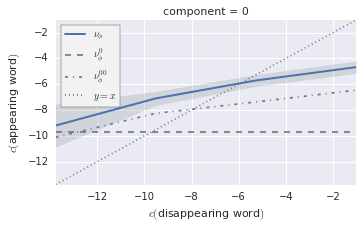

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 876 (cluster-unique) substitutions, but the PCA is in fact computed on 707 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 511 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.058068356393213394

intercept                      5.826721
global_aoa                    -0.020925
global_clustering             -0.109416
global_frequency               0.291589
global_letters_count          -0.036725
global_orthographic_density   -0.134025
global_synonyms_count         -0.069246
dtype: float64

Regressing global frequency with 511 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07667410138513642

intercept                                              13.111822
global_aoa                                             -0.228358
global_clustering                                       0.860670
global_frequency                                        0.057987
global_letters_count                                   -1.035279
global_orthographic_density                            -0.399500
glob

Regressing rel frequency with 511 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.2263350496912051

intercept                  -1.863160
rel_aoa                     0.009991
rel_clustering              0.107317
rel_frequency               0.591762
rel_letters_count          -0.165832
rel_orthographic_density   -0.301063
rel_synonyms_count         -0.072000
dtype: float64

Regressing rel frequency with 511 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.24170868111191002

intercept                                       -1.959730
rel_aoa                                          0.008660
rel_clustering                                   0.343094
rel_frequency                                    0.588158
rel_letters_count                               -0.044458
rel_orthographic_density                        -0.340055
rel_synonyms_count                              -0.003538
rel_aoa * rel_clustering                        -0.012808
rel_aoa * rel_frequency             

Regressing global aoa with 472 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.05885800485879522

intercept                      8.318794
global_aoa                     0.168695
global_clustering              0.285376
global_frequency              -0.103551
global_letters_count           0.061366
global_orthographic_density   -0.032138
global_synonyms_count         -0.093702
dtype: float64

Regressing global aoa with 472 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.10070695863466372

intercept                                              0.157272
global_aoa                                            -0.569554
global_clustering                                     -1.305176
global_frequency                                       0.759608
global_letters_count                                   1.357554
global_orthographic_density                           -1.594045
global_synonyms_count                                 -5.133870
global_aoa * global_clustering            

Regressing rel aoa with 472 measures, with interactions
           ^^^^^^^
R^2 = 0.15422252118378732

intercept                                        1.061340
rel_aoa                                          0.521890
rel_clustering                                  -0.409077
rel_frequency                                   -0.050177
rel_letters_count                               -0.004181
rel_orthographic_density                         0.315130
rel_synonyms_count                              -0.139395
rel_aoa * rel_clustering                        -0.182839
rel_aoa * rel_frequency                          0.027635
rel_aoa * rel_letters_count                      0.059580
rel_aoa * rel_orthographic_density               0.079235
rel_aoa * rel_synonyms_count                     0.004535
rel_clustering * rel_frequency                   0.047069
rel_clustering * rel_letters_count               0.330375
rel_clustering * rel_orthographic_density        0.142785
rel_clustering * rel_synonym

Regressing rel clustering with 405 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.026472659473012472

intercept                      0.644869
global_aoa                     0.025853
global_clustering              0.091852
global_frequency              -0.017758
global_letters_count           0.027240
global_orthographic_density    0.096031
global_synonyms_count         -0.004328
dtype: float64

Regressing rel clustering with 405 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.04660917229003625

intercept                                             -1.724306
global_aoa                                             0.202926
global_clustering                                     -0.076489
global_frequency                                      -0.032722
global_letters_count                                   0.272384
global_orthographic_density                            0.908094
global_synonyms_count                                  0.794681
global_aoa * global_clust

Regressing global clustering with 405 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.21853828250302654

intercept                                                -1.646919
global_aoa                                                0.692001
global_clustering                                         4.072104
global_frequency                                         -0.522565
global_letters_count                                      3.239659
global_orthographic_density                               3.807884
global_synonyms_count                                    -4.372606
rel_aoa                                                   0.379683
rel_clustering                                           -5.007405
rel_frequency                                             0.131879
rel_letters_count                                        -2.639793
rel_orthographic_density                                 -2.597016
rel_synonyms_count                                       -1.629689
global_

Regressing global letters_count with 511 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.04958322011158256

intercept                   5.845968
rel_aoa                    -0.006100
rel_clustering              0.102298
rel_frequency               0.036727
rel_letters_count           0.236482
rel_orthographic_density   -0.066329
rel_synonyms_count         -0.237248
dtype: float64

Regressing global letters_count with 511 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07591838846254872

intercept                                        5.989906
rel_aoa                                          0.002558
rel_clustering                                   0.059984
rel_frequency                                    0.141510
rel_letters_count                                0.212596
rel_orthographic_density                        -0.279049
rel_synonyms_count                              -0.440125
rel_aoa * rel_clustering                         0.125314
rel_aoa

Regressing rel letters_count with 511 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.29861002140878723

intercept                                                 64.626262
global_aoa                                                -1.158579
global_clustering                                          5.173592
global_frequency                                          -1.990043
global_letters_count                                      -6.826855
global_orthographic_density                              -14.734198
global_synonyms_count                                     -7.209824
rel_aoa                                                   -0.089592
rel_clustering                                           -10.234721
rel_frequency                                              4.842416
rel_letters_count                                          7.901730
rel_orthographic_density                                  10.453118
rel_synonyms_count                                         2.8

Regressing rel synonyms_count with 493 measures, no interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.05034760348086486

intercept                   0.084106
rel_aoa                    -0.012972
rel_clustering              0.031701
rel_frequency               0.020829
rel_letters_count           0.016323
rel_orthographic_density    0.021058
rel_synonyms_count          0.226817
dtype: float64

Regressing rel synonyms_count with 493 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.06985522300526203

intercept                                        0.137746
rel_aoa                                         -0.011176
rel_clustering                                  -0.034735
rel_frequency                                    0.037709
rel_letters_count                               -0.003336
rel_orthographic_density                         0.089146
rel_synonyms_count                               0.274877
rel_aoa * rel_clustering                         0.036374
rel_aoa * rel_f

Regressing global orthographic_density with 405 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10301625552796823

intercept                                              6.238040
global_aoa                                            -0.476433
global_clustering                                      0.543454
global_frequency                                      -0.242219
global_letters_count                                  -0.292009
global_orthographic_density                            0.972665
global_synonyms_count                                  0.418100
global_aoa * global_clustering                        -0.003761
global_aoa * global_frequency                          0.031521
global_aoa * global_letters_count                      0.013590
global_aoa * global_orthographic_density               0.042182
global_aoa * global_synonyms_count                     0.037160
global_clustering * global_frequency                  -0.030373
global_clustering * global

Regressing global orthographic_density with 405 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.08602014686472004

intercept                      2.054252
global_aoa                    -0.095499
global_clustering             -0.000699
global_frequency              -0.028364
global_letters_count          -0.015082
global_orthographic_density    0.193548
global_synonyms_count          0.133597
rel_aoa                        0.105472
rel_clustering                 0.121539
rel_frequency                  0.029013
rel_letters_count             -0.070474
rel_orthographic_density      -0.086319
rel_synonyms_count            -0.113666
dtype: float64

Regressing global orthographic_density with 405 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.26698253715062525

intercept                                                -33.175582
global_aoa                                                -0.324361
global_clustering                             